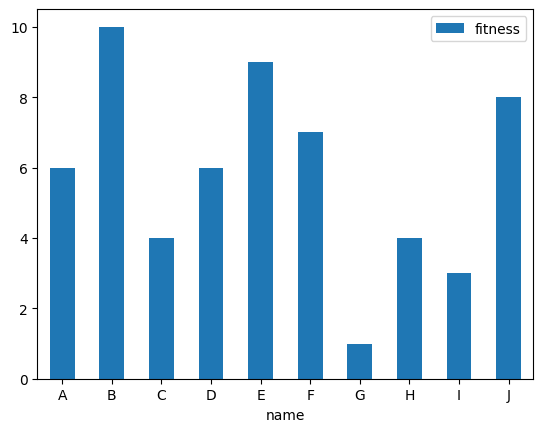

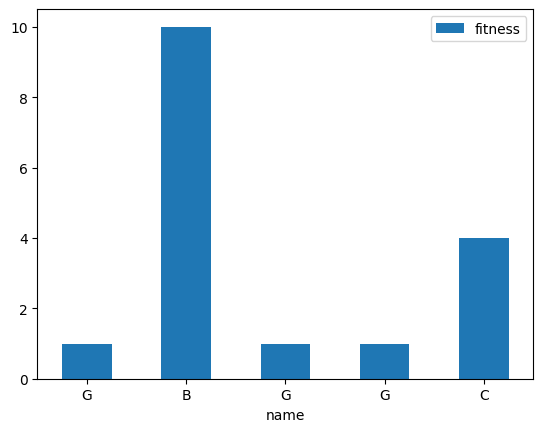

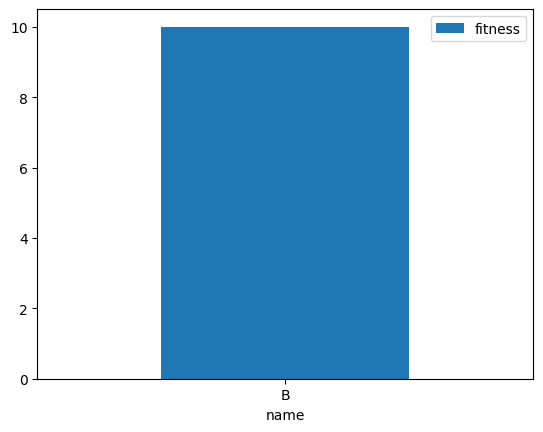

In [ ]:
#토너먼트 선택
import random
import pandas as pd
import matplotlib.pyplot as plt
from Basic_function import Individual  # 개체(Individual) 클래스 임포트

# 모집단 크기 및 토너먼트 크기 설정
POPULATION_SIZE = 10
TOURNAMENT_SIZE = 5

# 랜덤한 개체들로 모집단 생성
population = Individual.create_random_population(POPULATION_SIZE)

# 모집단에서 무작위로 TOURNAMENT_SIZE만큼 개체를 선택하여 하위 집단 생성
candidates = [random.choice(population) for _ in range(TOURNAMENT_SIZE)]

# 하위 집단에서 fitness 값이 가장 높은 개체 선택
best = [max(candidates, key=lambda ind: ind.fitness)]


def plot_individuals(individual_set):  # 개체들의 적합도를 시각화하는 함수
    df = pd.DataFrame({
        'name': [ind.name for ind in individual_set],  # 개체의 이름
        'fitness': [ind.fitness for ind in individual_set]  # 개체의 적합도 값
    })
    df.plot.bar(x='name', y='fitness', rot=0)  # 수직 막대 그래프 생성


# 모집단, 하위 집단, 선택된 최적 개체 시각화
plt.show()
plot_individuals(population)   # 모집단 시각화
plot_individuals(candidates)   # 하위 집단 시각화
plot_individuals(best)         # 최적 개체 시각화

In [453]:
#토너먼트 선택 함수화
def selection_tournament(individuals, group_size=2):
    # 선택된 개체를 저장할 리스트
    selected = []

    # 모집단 크기만큼 반복하여 개체 선택
    for _ in range(len(individuals)):
        # 랜덤하게 group_size 개수만큼 개체를 선택하여 하위 집단 생성
        candidates = [random.choice(individuals) for _ in range(group_size)]

        # 하위 집단에서 fitness 값이 가장 높은 개체를 선택하여 추가
        selected.append(max(candidates, key=lambda ind: ind.fitness))

    # 최종 선택된 개체 리스트 반환
    return selected


In [454]:
#토너먼트 선택 함수 실행
import random
from Basic_function import Individual

POPULATION_SIZE = 10
#random.seed(5) 고정된 난수값만 출력
population = Individual.create_random_population(POPULATION_SIZE) #모집단 설정
selected = selection_tournament(population, group_size = 3)  
print(f"Population: {population}")
print(f"Selected: {selected}")

Population: [A: 1, B: 9, C: 4, D: 6, E: 9, F: 2, G: 7, H: 3, I: 1, J: 4]
Selected: [B: 9, E: 9, J: 4, G: 7, B: 9, B: 9, B: 9, B: 9, B: 9, C: 4]


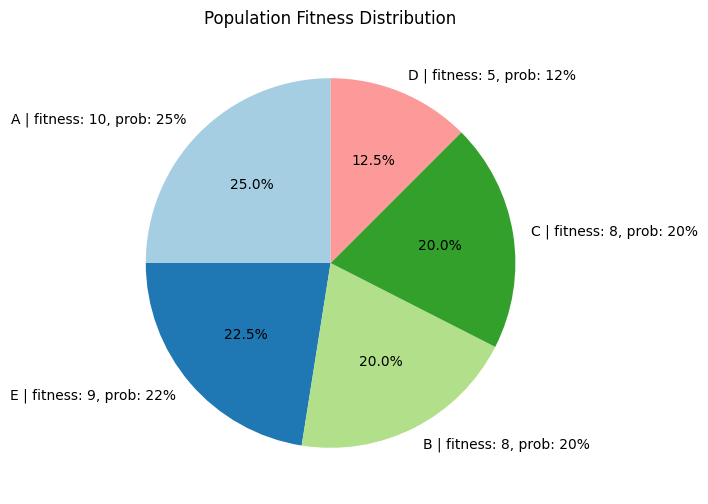

In [452]:
#비례적 선택
import random
import pandas as pd
import matplotlib.pyplot as plt
from Basic_function import Individual  # 개체(Individual) 클래스 임포트

# random.seed(4)  # 고정된 난수를 사용하여 동일한 결과 재현 가능 (주석 해제 시 사용)

POPULATION_SIZE = 5  # 모집단 크기 설정

# 랜덤한 개체들로 모집단 생성
unsorted_population = Individual.create_random_population(POPULATION_SIZE)

# 모집단을 fitness 값 기준으로 내림차순 정렬 (적합도가 높은 개체가 앞쪽)
population = sorted(unsorted_population, key=lambda ind: ind.fitness, reverse=True)

# 모집단 내 개체들의 fitness 값 총합 계산 (확률 계산에 사용)
fitness_sum = sum([ind.fitness for ind in population])

# 개체별 적합도 확률을 저장할 딕셔너리 생성
fitness_map = {}
for i in population:
    i_prob = round(100 * i.fitness / fitness_sum)  # 적합도 값에 따라 확률 계산
    i_label = f'{i.name} | fitness: {i.fitness}, prob: {i_prob}%'  # 개체의 정보 라벨링
    fitness_map[i_label] = i.fitness  # 딕셔너리에 저장

# 모집단 적합도 분포를 시각화 (파이 차트)
fig, ax = plt.subplots(figsize=(6, 6))  # 그래프 크기 설정
ax.pie(
    fitness_map.values(),  # 각 개체의 fitness 값을 비율로 사용
    labels=fitness_map.keys(),  # 개체의 이름 및 정보 라벨 표시
    autopct='%1.1f%%',  # 퍼센트 표시 (소수점 한 자리)
    startangle=90,  # 시작 각도를 90도로 설정하여 정렬
    colors=plt.cm.Paired.colors  # 색상 설정
)

# 그래프 제목 설정
ax.set_title("Population Fitness Distribution")

# 그래프 출력
plt.show()


In [18]:
#비례적 선택 함수화
import random

def selection_proportional(individuals):
    # 개체군을 fitness 값 기준으로 내림차순 정렬 (적합도가 높은 개체가 앞쪽)
    sorted_individuals = sorted(individuals, key=lambda ind: ind.fitness, reverse=True)

    # 모집단 내 개체들의 fitness 값 총합 계산 (룰렛 휠 선택을 위한 전체 크기)
    fitness_sum = sum([ind.fitness for ind in individuals])

    # 선택된 개체를 저장할 리스트
    selected = []

    # 모집단 크기만큼 개체 선택
    for _ in range(len(sorted_individuals)):
        # 0과 fitness_sum 사이의 무작위 값 생성 (룰렛 휠에서 화살표 역할)
        shave = random.random() * fitness_sum
        roulette_sum = 0  # 룰렛 휠의 현재 값 초기화

        # 룰렛 휠을 돌려 선택 과정 수행
    for ind in sorted_individuals:
        roulette_sum += ind.fitness  # 현재 개체의 fitness 값을 누적
        # 누적 fitness 값이 무작위로 선택된 값(shave)을 초과하면 해당 개체 선택
        if roulette_sum > shave:
            selected.append(ind)
            break  # 한 개체를 선택했으므로 내부 루프 종료

    # 선택된 개체 리스트 반환
    return selected

In [32]:
#비례적 선택 함수 실행
import random
from Basic_function import Individual

POPULATION_SIZE = 10
TURN_IT = 1
select_list = []
population = Individual.create_random_population(POPULATION_SIZE)

for i in range(TURN_IT):
    selected = selection_proportional(population)
    select_list.append(selected)
print(f"Population: {population}")
print(f"Selected: {select_list[0]}")

Population: [A: 6, B: 8, C: 10, D: 3, E: 1, F: 8, G: 1, H: 5, I: 6, J: 3]
Selected: [A: 6]


시작지점 4.3577300840650235
선택 간격 11.5


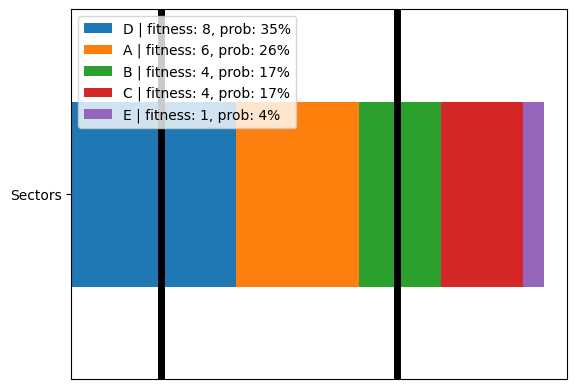

In [449]:
#sus
import random
import pandas as pd
import matplotlib.pyplot as plt
from Basic_function import Individual  # 개체(Individual) 클래스 임포트

POPULATION_SIZE = 5  # 모집단 크기 설정
select_size = 2  # 선택할 개체 수

# 랜덤한 개체들로 모집단 생성
unsorted_population = Individual.create_random_population(POPULATION_SIZE)

# 모집단을 fitness 값 기준으로 내림차순 정렬 (적합도가 높은 개체가 앞쪽)
population = sorted(unsorted_population, key=lambda ind: ind.fitness, reverse=True)

# 모집단 내 개체들의 fitness 값 총합 계산
fitness_sum = sum([ind.fitness for ind in population])

# 개체별 적합도 확률을 저장할 딕셔너리 생성
fitness_map = {}
for i in population:
    i_prob = round(100 * i.fitness / fitness_sum)  # 적합도 값에 따라 확률 계산
    i_label = f'{i.name} | fitness: {i.fitness}, prob: {i_prob}%'  # 개체의 정보 라벨링
    fitness_map[i_label] = i.fitness  # 딕셔너리에 저장

# 데이터프레임으로 변환하여 시각화 (적합도 기반 분포)
index = ['Sectors']
df = pd.DataFrame(fitness_map, index=index)
df.plot.barh(stacked=True)  # 수평 막대 그래프 생성

# 선택 간격(distance) 계산 (전체 적합도 값 / 선택할 개체 수)
distance = fitness_sum / select_size

# 선택 시작 지점(랜덤 오프셋) 계산
shift = random.random() * distance

# 선택 지점 출력
print('시작지점', shift)  
print('선택 간격', distance)

# 선택 지점을 그래프에 표시 (검은색 수직선)
for i in range(select_size):
    plt.axvline(x=shift + distance * i, linewidth=5, color='black')

# x축 눈금 및 라벨 제거
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


In [ ]:
#sus 함수화
def selection_stochastic_universal_sampling(individuals, select_size):
    # 개체군을 fitness 값 기준으로 내림차순 정렬 (적합도가 높은 개체가 앞쪽)
    sorted_individuals = sorted(individuals, key=lambda ind: ind.fitness, reverse=True)

    # 모집단 내 개체들의 fitness 값 총합 계산
    fitness_sum = sum(ind.fitness for ind in individuals)

    # 선택 간격 계산 (전체 fitness 값을 선택할 개체 수로 나눈 값)
    distance = fitness_sum / select_size

    # 첫 번째 선택 지점(랜덤 오프셋)을 설정
    shift = random.uniform(0, distance)

    # 선택 지점(borders) 생성 (각 개체가 선택될 지점을 미리 설정)
    borders = [shift + i * distance for i in range(select_size)]

    # 선택된 개체들을 저장할 리스트
    selected = []

    # 선택 지점에 해당하는 개체를 찾음
    for border in borders:
        i = 0  # 개체 리스트 인덱스 초기화
        roulette_sum = sorted_individuals[i].fitness  # 초기값 설정
        
        # 선택 지점(border)을 초과하는 개체를 찾을 때까지 반복
        while roulette_sum < border and i < len(sorted_individuals) - 1:
            i += 1
            roulette_sum += sorted_individuals[i].fitness  # 현재 개체의 fitness 값을 누적
        
        # 해당 개체를 선택 리스트에 추가
        selected.append(sorted_individuals[i])

    # 최종 선택된 개체 리스트 반환
    return selected

In [7]:
#sus 함수 실행
from Basic_function import Individual
POPULATION_SIZE = 10
select_size = 2

population =Individual.create_random_population(POPULATION_SIZE)
selected = selection_stochastic_universal_sampling(population,select_size)
print(f"Population: {population}")
print(f"Selected: {selected}")

Population: [A: 5, B: 9, C: 5, D: 1, E: 10, F: 2, G: 3, H: 8, I: 10, J: 2]
Selected: [B: 9, G: 3]


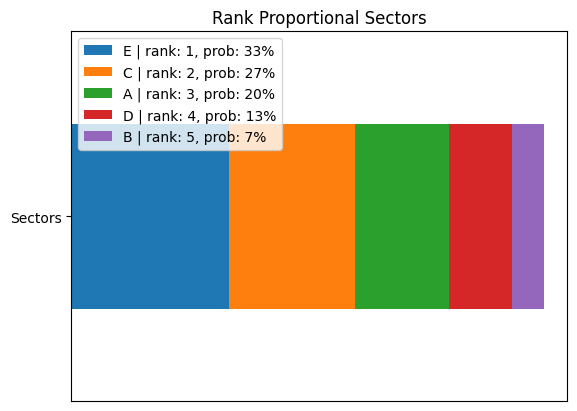

In [ ]:
#순위 선택
import random
import pandas as pd
import matplotlib.pyplot as plt
from Basic_function import Individual  # 개체(Individual) 클래스 임포트

POPULATION_SIZE = 5  # 모집단 크기 설정

# 랜덤한 개체들로 모집단 생성
unsorted_population = Individual.create_random_population(POPULATION_SIZE)

# 모집단을 fitness 값 기준으로 내림차순 정렬 (적합도가 높은 개체가 앞쪽)
population = sorted(unsorted_population, key=lambda ind: ind.fitness, reverse=True)

# 모집단 내 개체들의 fitness 값 총합 계산
fitness_sum = sum([ind.fitness for ind in population])

# fitness 값을 저장할 맵(딕셔너리) 생성 (현재 사용되지 않음)
fitness_map = {}

# 순위 선택을 위한 가중치 계산
rank_shift = 1 / POPULATION_SIZE  # 순위 간 가중치 차이 계산
rank_weight_sum = sum([1 - rank_shift * i for i in range(len(population))])  # 전체 순위 가중치 합 계산

# 순위 기반 선택 확률을 저장할 딕셔너리
rank_map = {}

# 각 개체에 대해 순위 기반 확률 계산 및 레이블 생성
for i in range(len(population)):
    i_rank = i + 1  # 개체의 순위 (1부터 시작)
    
    # 현재 개체의 순위 기반 선택 확률을 백분율로 변환
    Nth_individual_weight = round(100 * (1 - i * rank_shift) / rank_weight_sum)
    
    # 개체의 이름, 순위, 확률을 포함한 라벨 생성
    i_label = f'{population[i].name} | rank: {i_rank}, prob: {Nth_individual_weight}%'
    
    # 딕셔너리에 저장 (순위 기반 가중치)
    rank_map[i_label] = 1 - i * rank_shift

# 순위 기반 선택 확률을 데이터프레임으로 변환하여 시각화
rank_df = pd.DataFrame(rank_map, index=['Sectors'])
rank_df.plot.barh(stacked=True)  # 수평 막대 그래프 생성

# x축 눈금 및 라벨 제거
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# 그래프 제목 설정
plt.title('Rank Proportional Sectors')

# 그래프 출력
plt.show()

In [ ]:
#순위 선택 함수화
import random

def selection_rank(individuals):
    # 개체군을 fitness 값 기준으로 내림차순 정렬 (적합도가 높은 개체가 앞쪽)
    sorted_individuals = sorted(individuals, key=lambda ind: ind.fitness, reverse=True)

    # 순위 선택을 위한 가중치 계산
    rank_distance = 1 / len(individuals)  # 각 개체 간 순위 점수 차이 계산
    ranks = [(1 - i * rank_distance) for i in range(len(individuals))]  # 순위에 따른 가중치 부여
    ranks_sum = sum(ranks)  # 모든 가중치의 합 계산

    selected = []  # 선택된 개체를 저장할 리스트

    # 전체 개체 수만큼 반복하여 개체 선택
    for _ in range(len(sorted_individuals)):
        # 0과 ranks_sum 사이의 무작위 값 생성 (순위에 따른 선택)
        shave = random.random() * ranks_sum
        rank_sum = 0  # 누적 가중치 초기화

        # 순위 기반 선택 수행
        for i in range(len(sorted_individuals)):
            rank_sum += ranks[i]  # 현재 개체의 가중치를 누적
            if rank_sum > shave:  # 누적 가중치가 shave 값을 초과하면 해당 개체 선택
                selected.append(sorted_individuals[i])
                break  # 선택했으므로 반복 종료

    return selected  # 최종 선택된 개체 리스트 반환

In [12]:
#순위 선택 함수 사용
import random
from Basic_function import Individual

POPULATION_SIZE = 5
population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_rank(population)
print(f'Population: {population}')
print(f'Selected: {selected}')

Population: [A: 2, B: 2, C: 6, D: 2, E: 2]
Selected: [A: 2]


In [ ]:
#엘리트 선택 (순위 선택 기반)
import random

def selection_rank_with_elite(individuals, elite_size=0):  # elite_size는 상위 몇 개를 엘리트 선택으로 가져올 것인지 결정
    # 모집단을 fitness 값을 기준으로 내림차순 정렬 (즉, 높은 fitness 값을 가진 개체가 먼저 오도록 정렬)
    sorted_individuals = sorted(individuals, key=lambda ind: ind.fitness, reverse=True)

    # 엘리트 선택: 상위 elite_size개의 개체를 먼저 선택
    selected = sorted_individuals[0:elite_size]
    
    # 엘리트 개체를 제외한 나머지 개체들로 리스트 갱신
    del sorted_individuals[0:elite_size]

    # 순위 선택을 위한 준비 작업
    rank_distance = 1 / len(sorted_individuals)  # 각 개체 간 순위 점수 차이 계산
    ranks = [(1 - i * rank_distance) for i in range(len(sorted_individuals))]  # 순위에 따른 가중치 부여
    ranks_sum = sum(ranks)  # 모든 가중치의 합 계산
    
    # 엘리트 선택에서 제외된 개체들 중에서 순위 선택 방식으로 추가 개체를 선택
    for i in range(len(sorted_individuals)):  
        shave = random.random() * ranks_sum  # 0과 ranks_sum 사이의 랜덤 값 생성
        rank_sum = 0  # 누적 가중치 초기화

        # 순위 기반 선택 수행
        for i in range(len(sorted_individuals)):
            rank_sum += ranks[i]  # 현재 개체의 가중치를 누적
            if rank_sum >= shave:  # 누적 가중치가 shave 값을 초과하면 해당 개체 선택
                selected.append(sorted_individuals[i])
                break  # 선택했으므로 반복 종료

    return selected  # 최종 선택된 개체 리스트 반환

In [ ]:
#엘리트 선택 (순위 선택 기반)
from Basic_function import Individual
POPULATION_SIZE = 5
population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_rank_with_elite(population, elite_size = 2)
print(f"Population: {population}")
print(f"Population: {selected}")

Population: [A: 10, B: 5, C: 6, D: 3, E: 4]
Population: [A: 10, C: 6, E: 4]


In [ ]:
#엘리트 선택 (비례 선택 기반)
import random

def selection_proportional_with_elite_1(individuals, elite_size=0):
    
    # 개체군을 fitness 값 기준으로 내림차순 정렬 (적합도가 높은 개체가 앞쪽)
    sorted_individuals = sorted(individuals, key=lambda ind: ind.fitness, reverse=True)
    
    # 엘리트 선택: 상위 elite_size개의 개체를 먼저 선택
    selected = sorted_individuals[0:elite_size]

    # 엘리트 개체를 제외한 나머지 개체들로 리스트 갱신
    del sorted_individuals[0:elite_size]

    # 전체 fitness 값의 합을 계산 (룰렛 휠 선택을 위한 전체 크기)
    fitness_sum = sum(ind.fitness for ind in sorted_individuals)
    
    # 전체 개체 수만큼 반복하여 개체 선택
    for _ in range(len(sorted_individuals)):
        # 0과 fitness_sum 사이의 무작위 값 생성 (룰렛 휠에서 화살표 역할)
        shave = random.random() * fitness_sum
        roulette_sum = 0  # 룰렛 휠의 현재 값 초기화

        # 룰렛 휠을 돌려 선택 과정 수행
        for ind in sorted_individuals:
            print(shave, roulette_sum)  # 디버깅용 출력 (필요 없으면 제거 가능)
            roulette_sum += ind.fitness  # 현재 개체의 fitness 값을 누적

            # 누적 fitness 값이 무작위로 선택된 값(shave)을 초과하면 해당 개체 선택
            if roulette_sum > shave:
                selected.append(ind)
                break  # 한 개체를 선택했으므로 내부 루프 종료

    # 선택된 개체 리스트 반환
    return selected

In [ ]:
#엘리트 선택 (비례선택 기반)
from Basic_function import Individual
POPULATION_SIZE = 5
population = Individual.create_random_population(POPULATION_SIZE)
selected = selection_proportional_with_elite_1(population, elite_size = 2)
print(f"Population: {population}")
print(f"Population: {selected}")

11.752053405515614 0
11.752053405515614 6
11.752053405515614 11
Population: [A: 1, B: 6, C: 9, D: 8, E: 5]
Population: [C: 9, D: 8, A: 1]
